In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import glob
import itertools
import os

from run import Run
from runs_db import db as runs_db

[('martak', 81), ('gcp', 57), ('deepnet2', 22)]


In [2]:
log_path = '/home/fiit/logs'
runs = []

for server in runs_db:
    paths = glob.glob(os.path.join(log_path, server, '*'))
    paths = iter(sorted(paths))

    try:
        for (number, type_, code) in runs_db[server]:
            for _ in range(number):
                try:
                    path = next(paths)
                    runs.append(Run(path, type_, code))
                except KeyError:
                    print(path)
    except StopIteration:
        pass


In [29]:
tasks = ['dep', 'lmo', 'ner', 'pos']
langs = ['cs', 'de', 'en', 'es']

task_metr = {
    'dep': 'las',
    'lmo': 'perplexity',
    'ner': 'chunk_f1',
    'pos': 'acc'
}

task_max = {
    'dep': True,
    'lmo': False,
    'ner': True,
    'pos': True
}

def draw_graphs(metric_func, tasks, langs, role, run_codes=None, run_types=None):
    fig, axes = plt.subplots(len(tasks), len(langs), figsize=(5*len(langs), 4*len(tasks)), squeeze=False)

    relevant_runs = ['vanilla']

    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                run.contains(task, lang) and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):

                history = run.history(
                    metric=metric_func(task),
                    task=task,
                    language=lang,
                    role=role)
                axes[tasks.index(task), langs.index(lang)].plot(list(history), label=f'{run.code}-{run.type}')

    for ax, col in zip(axes[0], langs):
        ax.set_title(col)

    for ax, row in zip(axes[:, 0], tasks):
        ax.set_ylabel(row, rotation=0, size='large')

    plt.legend()        
    plt.show()
    
def print_results(metric_func, metric_max_func, tasks, langs, run_codes=None, run_types=None):
    
    for task, lang in itertools.product(tasks, langs):
        for run in runs:
            if (
                run.contains(task, lang) and
                (run_codes is None or run.code in run_codes) and
                (run_types is None or run.type in run_types)
            ):
                result = run.metric_eval(
                    metric=metric_func(task),
                    max_=metric_max_func(task),
                    task=task,
                    language=lang)
                print(f'{run.code} {run.type} {task} {lang}: {result}')
        

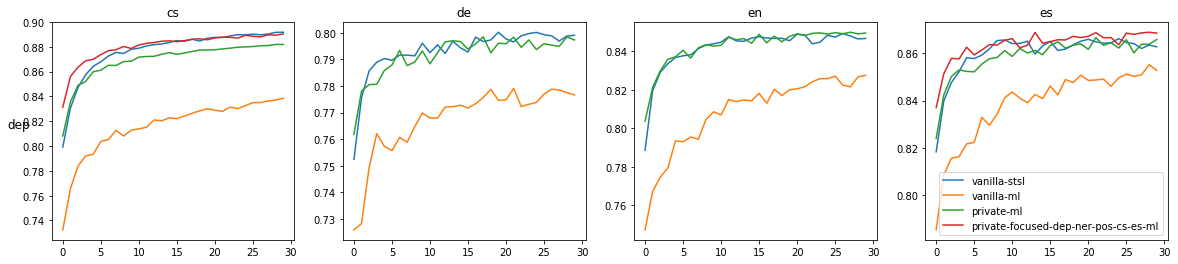

vanilla stsl dep cs: (0.891639970107578, 29)
vanilla ml dep cs: (0.83845347267682, 30)
private ml dep cs: (0.8818727949993918, 29)
private-focused-dep-ner-pos-cs-es ml dep cs: (0.8903539007872829, 30)
vanilla stsl dep de: (0.7992988067412966, 26)
vanilla ml dep de: (0.7775249108131381, 29)
private ml dep de: (0.79733054496248, 30)
vanilla stsl dep en: (0.8491886861166188, 27)
vanilla ml dep en: (0.8266499413264274, 29)
private ml dep en: (0.8494314733136406, 30)
vanilla stsl dep es: (0.8651044965167828, 20)
vanilla ml dep es: (0.8509002080883018, 28)
private ml dep es: (0.863837872070931, 28)
private-focused-dep-ner-pos-cs-es ml dep es: (0.8687234235049308, 22)
vanilla stsl lmo cs: (16.142887644975684, 30)
vanilla ml lmo cs: (23.464349638012088, 30)
private ml lmo cs: (1.0934995393760425, 30)
vanilla stsl lmo de: (17.1450364350731, 30)
vanilla ml lmo de: (22.102304065654774, 30)
private ml lmo de: (1.0837892014120665, 30)
vanilla stsl lmo en: (30.75313019769114, 28)
vanilla ml lmo en: 

In [30]:
draw_graphs(lambda task: task_metr[task], ['dep'], langs, 'test',
            ['private-focused-dep-ner-pos-cs-es',
             'private',
             'vanilla'
            ], ['stsl', 'ml'])
print_results(lambda task: task_metr[task], lambda task: task_max[task], tasks, langs, ['private-focused-dep-ner-pos-cs-es',
             'private',
             'vanilla'
            ], ['stsl', 'ml'])

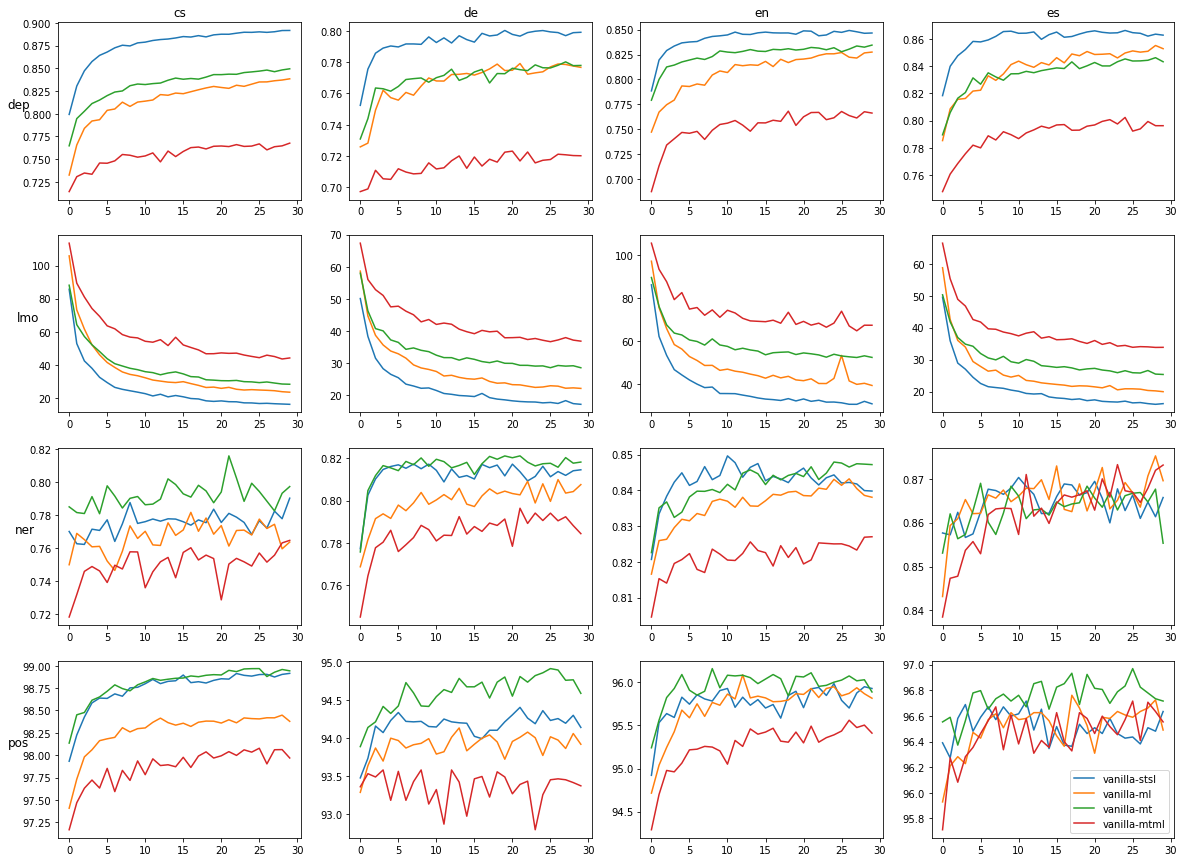

In [17]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test', ['vanilla'])

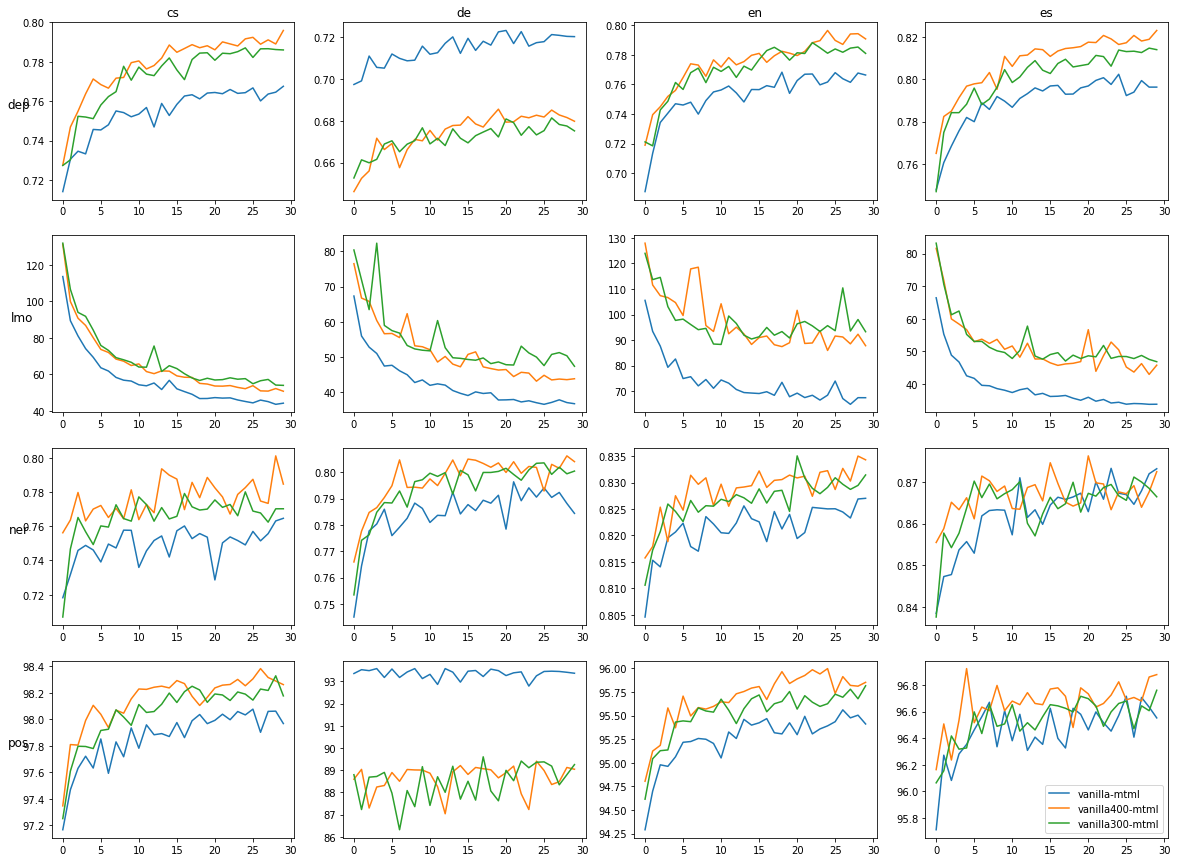

In [18]:
draw_graphs(lambda task: task_metr[task], tasks, langs, 'test',
            run_codes=['vanilla', 'vanilla300', 'vanilla400'],
            run_types=['mtml'])